In [51]:
%cd /content

/content


In [52]:
import pickle
with open("predict_result.pkl", "rb") as f:
    results = pickle.load(f)

with open("predict_result (1).pkl", "rb") as f:
    results_2 = pickle.load(f)
results_2

{'pos': (array([  0,   2,   3,   4,   5,   6,   9,  10,  11,  13,  14,  15,  17,
          18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  30,  31,  32,
          33,  34,  37,  38,  39,  40,  41,  43,  44,  45,  46,  47,  48,
          49,  53,  54,  55,  56,  58,  59,  60,  62,  64,  65,  67,  68,
          70,  71,  72,  73,  75,  76,  77,  79,  81,  82,  83,  84,  86,
          88,  90,  91,  95,  96,  97, 101, 102, 103, 104, 105, 106, 107,
         109, 110, 113, 114, 115, 116, 117, 118, 119, 124, 125, 130, 131,
         132, 133, 134, 136, 138, 139, 140, 141, 143, 146, 147, 148, 149,
         152, 153, 157, 158, 159, 161, 162, 164, 166, 167, 168, 170, 171,
         172, 174, 175, 178, 179, 180, 181, 182, 184, 185, 186, 187, 188,
         190, 192, 195, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206,
         207, 208, 209, 210, 211, 212, 213, 214, 217, 218, 219, 222, 223,
         225, 226, 227, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
         242, 243, 244, 245, 24

In [53]:
%cd /content/drive/MyDrive/大專生計畫/data

/content/drive/MyDrive/大專生計畫/data


In [54]:
import pandas as pd
import numpy as np
import os

In [55]:
dev_df = pd.read_json("dev.jsonl", lines=True)
dev_ann_df = pd.read_json(os.path.join("annotations", "dev_seen.json"), lines=True)
dev_ann_df.head()

,id,set_name,img,text,gold_hate,gold_pc,gold_attack,pc,attack
0,5349,dev_seen,img/05349.png,normal day in a islamic country,[not_hateful],[pc_empty],[attack_empty],None,None
1,17265,dev_seen,img/17265.png,meanwhile in baltimore,[not_hateful],[pc_empty],[attack_empty],None,None
2,91405,dev_seen,img/91405.png,wears rag on her head so her brother husband d...,[not_hateful],[pc_empty],[attack_empty],None,None
3,83497,dev_seen,img/83497.png,different types of radicalization,[not_hateful],[pc_empty],[attack_empty],None,None
4,4569,dev_seen,img/04569.png,when is the time to eat i am hungry,[not_hateful],[pc_empty],[attack_empty],None,None


In [56]:
results["pos"]

(array([  0,   2,   4,   5,   9,  10,  11,  12,  15,  17,  18,  20,  22,
         23,  24,  25,  26,  28,  29,  30,  31,  33,  34,  36,  37,  39,
         40,  41,  42,  43,  45,  47,  48,  49,  53,  54,  55,  56,  59,
         61,  62,  64,  65,  66,  67,  70,  71,  72,  75,  77,  81,  83,
         84,  88,  91,  95,  97,  99, 101, 102, 105, 106, 108, 112, 113,
        115, 116, 117, 119, 124, 125, 126, 131, 137, 140, 142, 146, 147,
        149, 152, 156, 157, 158, 159, 162, 164, 166, 167, 168, 170, 171,
        174, 175, 178, 179, 182, 187, 188, 190, 195, 198, 201, 204, 207,
        208, 209, 210, 211, 212, 214, 216, 217, 223, 225, 226, 227, 230,
        231, 232, 233, 234, 235, 236, 237, 242, 243, 245, 246, 248, 249,
        251, 252, 253, 255, 259, 262, 263, 269, 270, 271, 274, 277, 279,
        282, 284, 287, 289, 292, 297, 299, 301, 305, 309, 311, 313, 315,
        318, 320, 323, 327, 331, 332, 334, 336, 337, 339, 342, 343, 344,
        345, 349, 350, 351, 355, 356, 357, 358, 359

In [57]:
import matplotlib.pyplot as plt

pred_nothate = dev_df.loc[results["neg"][0], :]
pred_hate = dev_df.loc[results["pos"][0], :]

print("準確度：",
      (len(pred_nothate[pred_nothate["label"] == 0]) + len(pred_hate[pred_hate["label"] == 1]))/len(dev_df)
)
print("Hate準確度：",
      (len(pred_hate[pred_hate["label"] == 1]))/len(dev_df[dev_df["label"]==1])
)
print("NotHate準確度：",
      (len(pred_nothate[pred_nothate["label"] == 0]))/len(dev_df[dev_df["label"]==0])
)

準確度： 0.712
Hate準確度： 0.688
NotHate準確度： 0.736


In [58]:
error_cases = list(pred_hate[pred_hate["label"] == 0].index)+list(pred_nothate[pred_nothate["label"] == 1].index)
len(error_cases)

144

In [59]:
dev_ann_df.loc[error_cases, :]

,id,set_name,img,text,gold_hate,gold_pc,gold_attack,pc,attack
62,47103,dev_seen,img/47103.png,maybe we weren't consistent sources of crime w...,[not_hateful],[pc_empty],[attack_empty],None,None
67,35497,dev_seen,img/35497.png,old people at weddings always poke me and say ...,[not_hateful],[pc_empty],[attack_empty],None,None
84,20984,dev_seen,img/20984.png,when you are white and stole your first bike,[not_hateful],[pc_empty],[attack_empty],None,None
99,8795,dev_seen,img/08795.png,when you are white and working in oil field,[not_hateful],[pc_empty],[attack_empty],None,None
102,43698,dev_seen,img/43698.png,don't be late for work get the protestor plow,[not_hateful],[pc_empty],[attack_empty],None,None
...,...,...,...,...,...,...,...,...,...
409,26943,dev_seen,img/26943.png,my incesters built this country!!!!,[hateful],[race],[inferiority],"[[race], [race], [race]]","[[inferiority], [inferiority], [inferiority]]"
419,4769,dev_seen,img/04769.png,if she's pouting like this and you don't immed...,[hateful],[sex],[contempt],"[[sex], [sex], [sex]]","[[contempt], [contempt], [inferiority]]"
441,10285,dev_seen,img/10285.png,you are what you eat meanwhile in africa,[hateful],[nationality],[inferiority],"[[nationality], [race], [nationality]]","[[inferiority], [inferiority], [inferiority]]"
446,2634,dev_seen,img/02634.png,and just like that... this sandwich maker doub...,[hateful],[sex],[dehumanizing],"[[sex], [sex], [sex]]","[[dehumanizing], [dehumanizing], [dehumanizing]]"


In [60]:
error_dict = {
    "pc_empty": 0,
    "religion": 0,
    "race": 0,
    "sex": 0,
    "nationality": 0,
    "disability": 0
}

for datum in dev_ann_df.loc[error_cases, :]['gold_pc']:
    for pc in datum:
        error_dict[pc] += 1

error_dict

{'pc_empty': 75,
 'religion': 23,
 'race': 26,
 'sex': 16,
 'nationality': 10,
 'disability': 7}

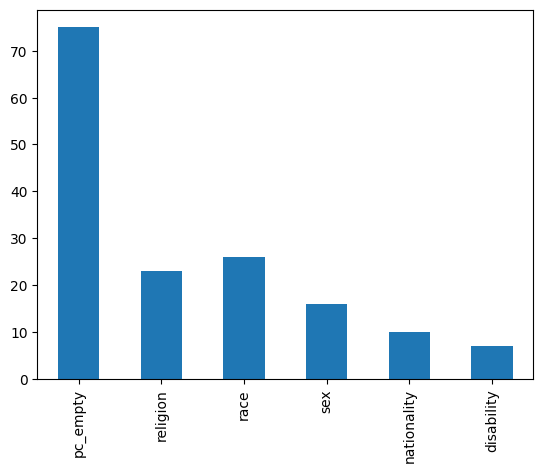

In [61]:
pd.Series(error_dict).plot(kind='bar')
plt.show()

In [62]:
import spacy

nlp = spacy.load("en_core_web_sm")

def remove_and_lemma(text):
    text = text.lower()
    return [token.lemma_ for token in nlp(text) if not token.is_stop and token.is_alpha]

dev_df["tokens"] = dev_df["text"].apply(remove_and_lemma)
dev_df.head()

,id,img,label,text,tokens
0,8291,img/08291.png,1,white people is this a shooting range,"[white, people, shoot, range]"
1,46971,img/46971.png,1,bravery at its finest,"[bravery, fine]"
2,3745,img/03745.png,1,your order comes to $37.50 and your white priv...,"[order, come, white, privilege, discount, brin..."
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...,"[time, send, parasite, desert]"
4,80243,img/80243.png,1,mississippi wind chime,"[mississippi, wind, chime]"


In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

def draw_wordcloud(series):
    corpus = [" ".join(tokens) for tokens in series]
    # construct the corpus
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_values = X.todense().tolist()
    df = pd.DataFrame(tfidf_values, columns=feature_names)

    wc = WordCloud(
        background_color="white",
        max_words=2000,
        max_font_size=60,
    )
    # create wordcloud
    wc.generate_from_frequencies(df.T.sum(axis=1))

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

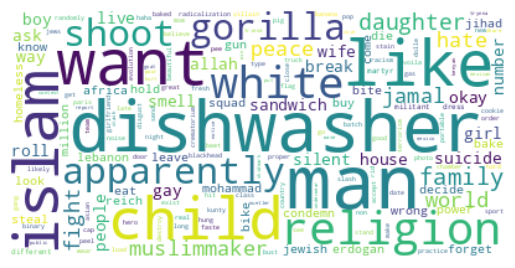

In [64]:
draw_wordcloud(dev_df.loc[error_cases, :][dev_df.loc[error_cases, :]["label"]==0]["tokens"])

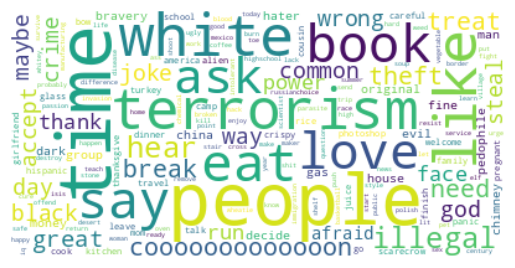

In [65]:
draw_wordcloud(dev_df.loc[error_cases, :][dev_df.loc[error_cases, :]["label"]==1]["tokens"])

In [66]:
pred_nothate = dev_df.loc[results_2["neg"][0], :]
pred_hate = dev_df.loc[results_2["pos"][0], :]

print("準確度：",
      (len(pred_nothate[pred_nothate["label"] == 0]) + len(pred_hate[pred_hate["label"] == 1]))/len(dev_df)
)
print("Hate準確度：",
      (len(pred_hate[pred_hate["label"] == 1]))/len(dev_df[dev_df["label"]==1])
)
print("NotHate準確度：",
      (len(pred_nothate[pred_nothate["label"] == 0]))/len(dev_df[dev_df["label"]==0])
)

準確度： 0.612
Hate準確度： 0.76
NotHate準確度： 0.464


In [67]:
error_cases_2 = list(pred_hate[pred_hate["label"] == 0].index)+list(pred_nothate[pred_nothate["label"] == 1].index)
len(error_cases_2)

194

In [68]:
error_dict = {
    "pc_empty": 0,
    "religion": 0,
    "race": 0,
    "sex": 0,
    "nationality": 0,
    "disability": 0
}

for datum in dev_ann_df.loc[error_cases_2, :]['gold_pc']:
    for pc in datum:
        error_dict[pc] += 1

error_dict

{'pc_empty': 90,
 'religion': 40,
 'race': 32,
 'sex': 27,
 'nationality': 9,
 'disability': 7}

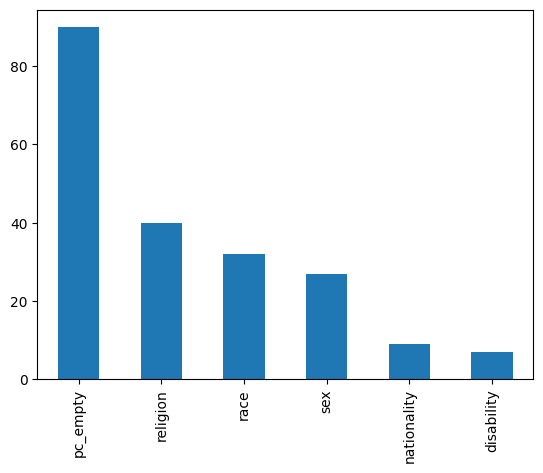

In [69]:
pd.Series(error_dict).plot(kind='bar')
plt.show()

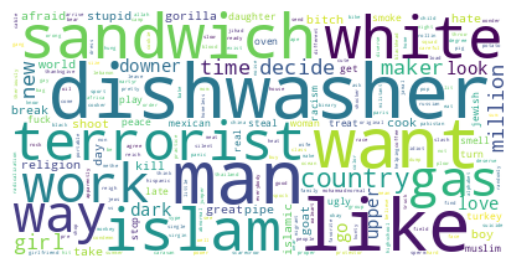

In [70]:
draw_wordcloud(dev_df.loc[error_cases_2, :][dev_df.loc[error_cases_2, :]["label"]==0]["tokens"])

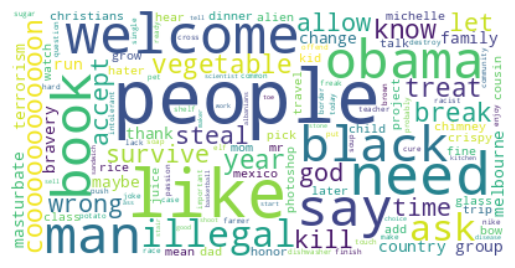

In [71]:
draw_wordcloud(dev_df.loc[error_cases_2, :][dev_df.loc[error_cases_2, :]["label"]==1]["tokens"])

In [76]:
with_external_errors = list(set(error_cases) - set(error_cases_2))
without_external_errors = list(set(error_cases_2) - set(error_cases))
both_errors = list(set(error_cases) & set(error_cases_2))

In [86]:
dev_df.loc[both_errors, :]

,id,img,label,text,tokens
1,46971,img/46971.png,1,bravery at its finest,"[bravery, fine]"
7,53046,img/53046.png,1,"you've heard of elf on a shelf, now get ready for","[hear, elf, shelf, ready]"
8,82301,img/82301.png,1,cooooooooooooon!!!!,[cooooooooooooon]
16,25149,img/25149.png,1,if this offends you you might be lack toes int...,"[offend, lack, toe, intolerant]"
27,62035,img/62035.png,1,thank god my ass needed a break,"[thank, god, ass, need, break]"
...,...,...,...,...,...
446,50261,img/50261.png,1,haters will say it's photoshop,"[hater, photoshop]"
452,16749,img/16749.png,0,broken dishwasher,"[break, dishwasher]"
482,37692,img/37692.png,0,"""islam is a religion of peace stop criticizing...","[islam, religion, peace, stop, criticize, reli..."
488,5439,img/05439.png,0,portable dishwasher slash sandwich maker,"[portable, dishwasher, slash, sandwich, maker]"


In [80]:
dev_df.loc[with_external_errors, :]

,id,img,label,text,tokens
3,83745,img/83745.png,1,it is time.. to send these parasites back to t...,"[time, send, parasite, desert]"
132,61973,img/61973.png,1,what do alcoholics and necrophiliacs have in c...,"[alcoholic, necrophiliac, common, love, crack,..."
387,19508,img/19508.png,1,the definition of utter disgust in plain black...,"[definition, utter, disgust, plain, black, white]"
6,1796,img/01796.png,1,life hack #23 how to get stoned with no weed,"[life, hack, stone, weed]"
134,73069,img/73069.png,1,immigration invasion learn the difference,"[immigration, invasion, learn, difference]"
391,50241,img/50241.png,1,"bitches be like no weave, no makeup, no lashes...","[bitch, like, weave, makeup, lash, eyebrow]"
137,54206,img/54206.png,0,you can smell disgust and hate from this photo,"[smell, disgust, hate, photo]"
267,73914,img/73914.png,1,be careful who you call ugly in highschool,"[careful, ugly, highschool]"
268,3197,img/03197.png,1,i'm no bird expert but i'm guessing it's 4 fem...,"[bird, expert, guess, female, male]"
13,17963,img/17963.png,1,removes polish with chemicals nobody bats an e...,"[remove, polish, chemical, bat, eye, remove, p..."


In [81]:
dev_df.loc[without_external_errors, :]

,id,img,label,text,tokens
12,45368,img/45368.png,1,enough is enough children are more important t...,"[child, important, freak]"
29,92058,img/92058.png,1,how black people became christians,"[black, people, christians]"
36,59140,img/59140.png,1,wanna go masturbate? fuck yeah! masturbating!,"[wanna, masturbate, fuck, yeah, masturbate]"
42,12973,img/12973.png,1,someone added to much soap to the dishwasher a...,"[add, soap, dishwasher]"
58,91405,img/91405.png,0,wears rag on her head so her brother husband d...,"[wear, rag, head, brother, husband, not, want,..."
...,...,...,...,...,...
489,34528,img/34528.png,1,every kitchen needs a sandwich maker just like...,"[kitchen, need, sandwich, maker, like]"
491,16704,img/16704.png,0,"last summer camp was so ""lit""","[summer, camp, lit]"
497,48670,img/48670.png,0,look at this sandwich maker club i found on wi...,"[look, sandwich, maker, club, find, wish, clea..."
498,9863,img/09863.png,0,diverse group of women,"[diverse, group, woman]"


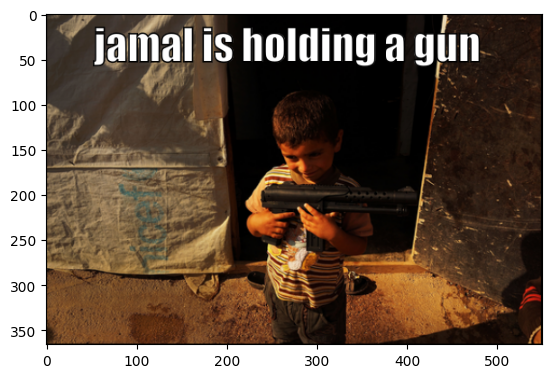

In [94]:
import matplotlib.image as mpimg
img = mpimg.imread('img/73945.png')
imgplot = plt.imshow(img)
plt.show()